### Install libraries

First, import all the necessary libraries into our notebook. LibROSA and SciPy are the Python libraries used for processing audio signals.

### Introduction to sound waves

Speech sound waves propagate through the air and are captured by a microphone which converts the pressure wave into electrical activity which can be captured. The electrical activity is sampled to create a sequence of waveform samples that describe the signal. Music signals are typically sampled at 44,100 Hz (or 44,100 samples per second). Due to the Nyquist theorem, this means that audio with frequencies of up to 22,050 Hz can be faithfully captured by sampling. Speech signals have less high frequency (only up to 8000 Hz) information so a sampling rate of 16,000 Hz is typically used. Speech over conventional telephone lines and most mobile phones is band-limited to about 3400 Hz, so a sampling rate of 8000 Hz is typically used for telephone speech.

In [2]:
%pylab inline
import os
import librosa   #for audio processing
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile #for audio processing
import glob
import speech_recognition as sr
import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


In [3]:
train_audio_path = 'C:/Users/wanyi/Desktop/Deep Learning/Group Project/common_voice_wav/'
audio_file = glob.glob(train_audio_path+'*.wav')

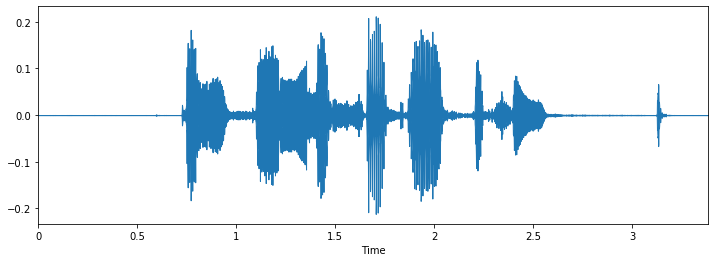

In [4]:
import librosa.display
samples, sample_rate = librosa.load(audio_file[0], sr = 16000)
plt.figure(figsize=(12, 4))
librosa.display.waveplot(samples, sr=sample_rate)

In [ ]:
ipd.Audio(data=samples, rate=sample_rate)

#### Spectrogram
* A spectrogram is a visual way of representing the signal strength, or “loudness”, of a signal over time at various frequencies present in a particular waveform. Not only can one see whether there is more or less energy at, for example, 2 Hz vs 10 Hz, but one can also see how energy levels vary over time.
* A spectrogram is usually depicted as a heat map, i.e., as an image with the intensity shown by varying the color or brightness.
* We can display a spectrogram using. librosa.display.specshow.

In [14]:
len(librosa.stft(samples))
len(samples)

54144

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

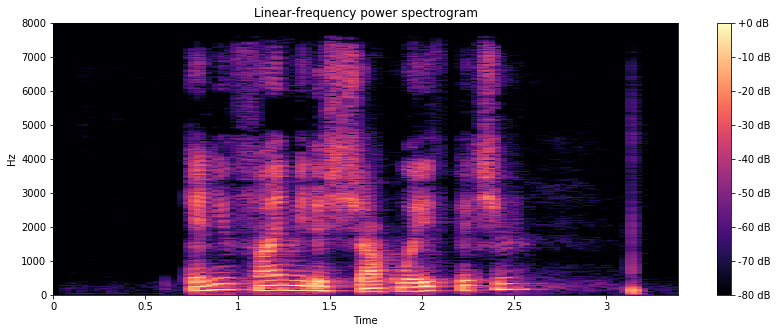

In [12]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(samples)), ref=np.max)
plt.figure( figsize = (14,5))
librosa.display.specshow(D, y_axis='linear', sr=sample_rate, x_axis='time',)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

### Feature extraction from Audio signal
 
* Every audio signal consists of many features. However, we must extract the characteristics that are relevant to the problem we are trying to solve. The process of extracting features to use them for analysis is called feature extraction. Let us study a few of the features in detail.

* The spectral features (frequency-based features), which are obtained by converting the time-based signal into the frequency domain using the Fourier Transform, like fundamental frequency, frequency components, spectral centroid, spectral flux, spectral density, spectral roll-off, etc.

* 1. Spectral Centroid
    * The spectral centroid indicates at which frequency the energy of a spectrum is centered upon or in other words It indicates where the ” center of mass” for a sound is located. This is like a weighted mean:
    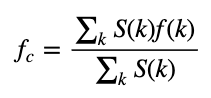
    
    * where S(k) is the spectral magnitude at frequency bin k, f(k) is the frequency at bin k.

* librosa.feature.spectral_centroid computes the spectral centroid for each frame in a signal:

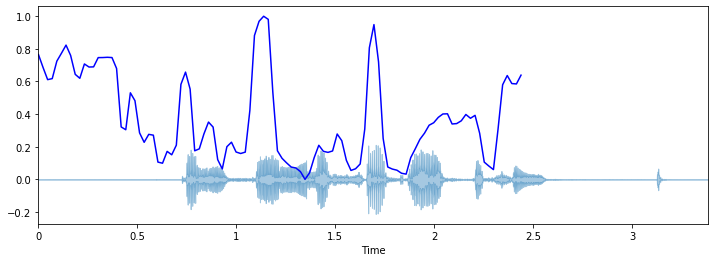

In [6]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(samples, sr=sample_rate)[0]
spectral_centroids.shape

# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(samples, sr=sample_rate, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

* There is a rise in the spectral centroid in the beginning.

#### 2. Spectral Rolloff

It is a measure of the shape of the signal. It represents the frequency at which high frequencies decline to 0. To obtain it, we have to calculate the fraction of bins in the power spectrum where 85% of its power is at lower frequencies.

librosa.feature.spectral_rolloff computes the rolloff frequency for each frame in a signal:

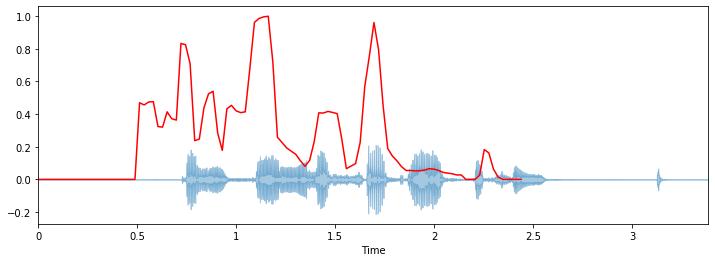

In [50]:
spectral_rolloff = librosa.feature.spectral_rolloff(samples+0.01, sr=sample_rate)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveplot(samples, sr=sample_rate, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

#### 3. Spectral Bandwidth

The spectral bandwidth is defined as the width of the band of light at one-half the peak maximum (or full width at half maximum [FWHM]) and is represented by the two vertical red lines and λSB on the wavelength axis. librosa.feature.spectral_bandwidth computes the order-p spectral bandwidth:
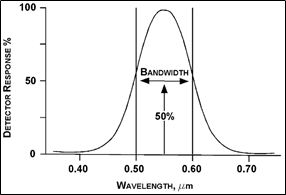

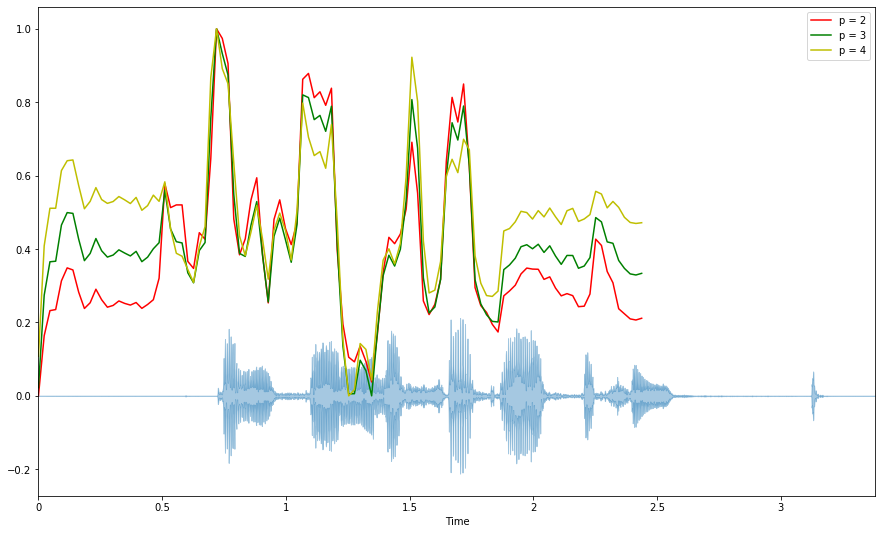

In [52]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(samples+0.01, sr=sample_rate)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(samples+0.01, sr=sample_rate, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(samples+0.01, sr=sample_rate, p=4)[0]
plt.figure(figsize=(15, 9))
librosa.display.waveplot(samples, sr=sample_rate, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

#### 4. Zero-Crossing Rate

A very simple way for measuring the smoothness of a signal is to calculate the number of zero-crossing within a segment of that signal. A voice signal oscillates slowly — for example, a 100 Hz signal will cross zero 100 per second — whereas an unvoiced fricative can have 3000 zero crossings per second.
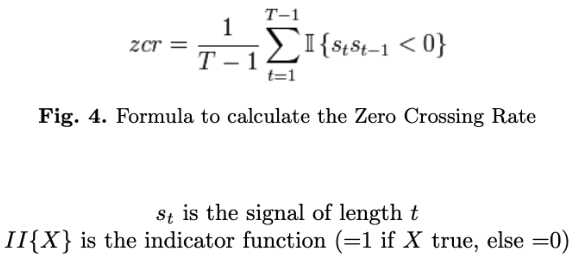
It usually has higher values for highly percussive sounds like those in metal and rock. Now let us visualize it and see how we calculate zero crossing rate.

#### 5. Mel-Frequency Cepstral Coefficients(MFCCs)

The Mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope. It models the characteristics of the human voice.

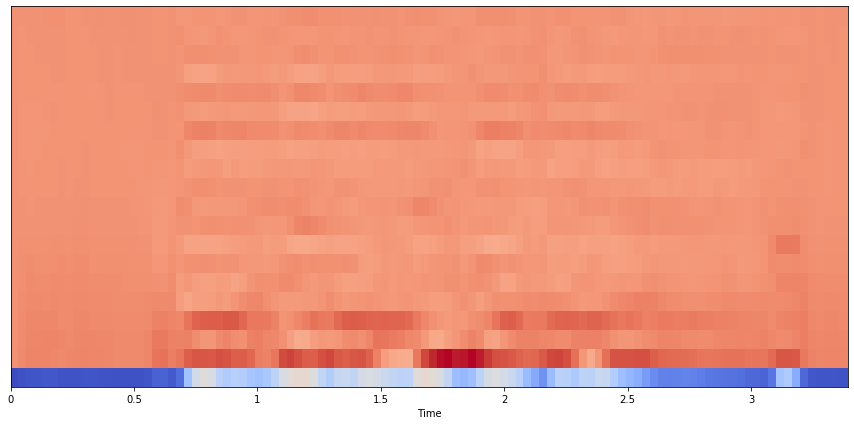

In [5]:
mfccs = librosa.feature.mfcc(samples, sr=sample_rate)
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

#### 6. Chroma feature

A chroma feature or vector is typically a 12-element feature vector indicating how much energy of each pitch class, {C, C#, D, D#, E, …, B}, is present in the signal. In short, It provides a robust way to describe a similarity measure between music pieces.

librosa.feature.chroma_stft is used for the computation of Chroma features.

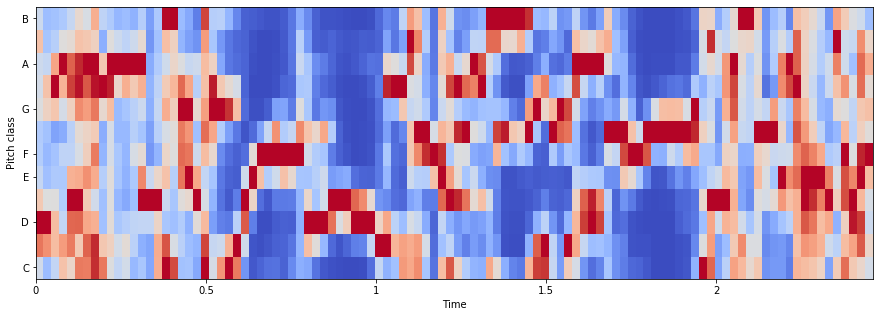

In [55]:
hop_length = 512
chromagram = librosa.feature.chroma_stft(samples, sr=sample_rate, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

### Feature extraction for speech recognition

* Short-time Fourier Analysis
    * One thing that is apparent from observing these waveforms is that speech is a non-stationary signal. That means its statistical properties change over time. Therefore, in order to properly analyze a speech signal, we need to examine the signal in chunks (also called windows or frames) that are small enough that the speech can be assumed to be stationary within those windows. Thus, we perform the analysis on a series of short, overlapping frames of audio. In speech recognition, we typically use windows of length 0.025 sec (25 ms) with an overlap of 0.01 (10 ms). This corresponds to a frame rate of 100 frames per second.

    * Because we are extracting a chunk from a longer continuous signal is it important to take care of edge effects by applying a window to the frame of data. Typically, a Hamming window is used although other windows may also be used.

    * If we let m be in the frame index, n is the sample index, and L is the frame size in samples and N is the frame shift in samples, each frame of audio is exacted from the original signal as
    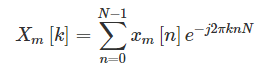
       where  w[n]  is the window function.
    * We then transform each frame of data into the frequency-domain using a discrete Fourier transform.
    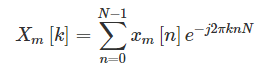
    * Note that all modern software packages have routines for efficiently computing the Fast Fourier Transform (FFT), which is an efficient way of computing the discrete Fourier transform.

### Mel Filtering

From the spectrogram you can see high energy regions at the high frequencies (upper portion of the figure) which correspond roughly to unvoiced consonants and high energy regions at the lower frequencies which correspond roughly to voiced vowels. You'll also notice the horizonal lines in the voiced regions which signify the harmonic structure of voice speech.

To remove variability in the spectrogram caused by the harmonic structure in the voiced regions and the random noise in the unvoiced regions, we perform a spectral smoothing operation on the magnitude spectrum. We apply a filterbank which is motivated by the processing done by the auditory system. This filterbank applies an approximately logarithmic scale to the frequency axis. That is, the filters become wider and farther apart as frequency increases. The most common filterbank used for feature extraction is known as the mel filterbank. A mel filterbank of 40 filters is shown here. Each filter will average the power spectrogram across a different frequency range.

# James 

In [ ]:
pip install torch

In [ ]:
1+1

In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable
cuda = True if torch.cuda.is_available() else False

N_FFT = 512
N_CHANNELS = round(1 + N_FFT/2)
OUT_CHANNELS = 32


class RandomCNN(nn.Module):
    def __init__(self):
        super(RandomCNN, self).__init__()

        # 2-D CNN
        self.conv1 = nn.Conv2d(1, OUT_CHANNELS, kernel_size=(3, 1), stride=1, padding=0)
        self.LeakyReLU = nn.LeakyReLU(0.2)

        # Set the random parameters to be constant.
        weight = torch.randn(self.conv1.weight.data.shape)
        self.conv1.weight = torch.nn.Parameter(weight, requires_grad=False)
        bias = torch.zeros(self.conv1.bias.data.shape)
        self.conv1.bias = torch.nn.Parameter(bias, requires_grad=False)

    def forward(self, x_delta):
        out = self.LeakyReLU(self.conv1(x_delta))
        return out


"""
a_random = Variable(torch.randn(1, 1, 257, 430)).float()
model = RandomCNN()
a_O = model(a_random)
print(a_O.shape)
"""